Universidad del Valle de Guatemala

## Proyecto 1: Análisis exploratorio

Laura Tamath	19365 |     Andrea Amaya 19357 |
Brandon Hernández	 19376 |		Martin Amado	19020 |   Juan Pablo Pineda 19087

In [1]:
import pandas as pd 
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import pyclustertend 
import random
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix
import sklearn.preprocessing
from sklearn.cluster import Birch, KMeans

pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None 

In [2]:
var_names = ['dep_reg', 'mun_reg', 'mon_reg', 'year_reg', 'dep_occu','mun_occu','area_geog','sex_death','day_occu',
'month_occu','year_occu','part_type','birth_class','via_part','weeks_ges', 'mother_age' ,'mom_country_res','mom_dep_res',
'mom_mun_resi', 'mom_group', 'mom_civil_status', 'mom_nationality', 'mom_scholarship', 'mom_occupation', 'cause_death',
'assistance_received', 'site_occu', 'total_children', 'total_dead_children', 'total_living_children']

quan_vars = ['weeks_ges', 'mother_age', 'total_children', 'total_dead_children', 'total_living_children']
qual_vars = []
for var in var_names: 
  if var not in quan_vars: qual_vars.append(var)

In [3]:
def filter_df(data_frame, to_remove, is_quali=True):
  df = data_frame.copy()
  all_vars = var_names[:]
  remove_vars = to_remove[:]

  for var in remove_vars: all_vars.remove(var)
  df.columns = all_vars
  for var in remove_vars:
    df[var] = np.full(len(df.index), np.nan if is_quali else 0)
  return df.reindex(sorted(df.columns), axis=1).copy()

In [4]:
df_2009 = pd.read_spss('./data/db_2009.sav')
df_2010 = pd.read_spss('./data/db_2010.sav')
df_2011 = pd.read_spss('./data/db_2011.sav')
df_2012 = pd.read_spss('./data/db_2012.sav')
df_2013 = pd.read_spss('./data/db_2013.sav')
df_2014 = pd.read_spss('./data/db_2014.sav')
df_2015 = pd.read_spss('./data/db_2015.sav')
df_2016 = pd.read_spss('./data/db_2016.sav')
df_2017 = pd.read_spss('./data/db_2017.sav')
df_2018 = pd.read_spss('./data/db_2018.sav')
df_2019 = pd.read_spss('./data/db_2019.sav')
df_2020 = pd.read_spss('./data/db_2020.sav')

# Filter data
remove_2009 = ['via_part', 'mom_country_res', 'mom_scholarship']
remove_2010_2011 = ['mom_country_res']
remove_2012_2013_2014 = ['year_occu']
remove_2018_2019_2020 = ['area_geog']

df_2009 = filter_df(df_2009, remove_2009)
df_2009['year_occu'] = np.full(len(df_2009.index), '2009')
df_2009['year_reg'] = np.full(len(df_2009.index), '2009')
df_2010 = filter_df(df_2010, remove_2010_2011)
df_2011 = filter_df(df_2011, remove_2010_2011)
df_2012 = filter_df(df_2012, remove_2012_2013_2014)
df_2012['year_occu'] = np.full(len(df_2012.index), '2012')
df_2013 = filter_df(df_2013, remove_2012_2013_2014)
df_2013['year_occu'] = np.full(len(df_2013.index), '2013')
df_2014 = filter_df(df_2014, remove_2012_2013_2014)
df_2014['year_occu'] = np.full(len(df_2014.index), '2014')
df_2015= filter_df(df_2015, [])
df_2016= filter_df(df_2016, [])
df_2017= filter_df(df_2017, [])
df_2018 = filter_df(df_2018, remove_2018_2019_2020)
df_2019 = filter_df(df_2019, remove_2018_2019_2020)
df_2020 = filter_df(df_2020, remove_2018_2019_2020)
data = pd.concat([df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020])

data['day_occu'] = data['day_occu'].astype(float)
data['day_occu'] = data['day_occu'].astype(int)
data['year_reg'] = data['year_reg'].astype(float)
data['year_reg'] = data['year_reg'].astype(int)
data['year_occu'] = data['year_occu'].astype(int)
data[qual_vars] = data[qual_vars].astype(str)
data = data.reset_index()


quan_df = data[quan_vars].replace('Ignorado', -1).fillna(-1)
data = pd.concat([quan_df, data[qual_vars]], axis=1)

data = data.drop(data[data[quan_vars[0]] < 0].index)
data = data.drop(data[data[quan_vars[1]] < 0].index)

data = data.sample(n=380, random_state=1)


dep_reg


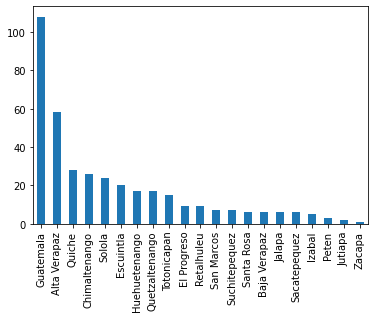

<Figure size 1440x360 with 0 Axes>


mun_reg


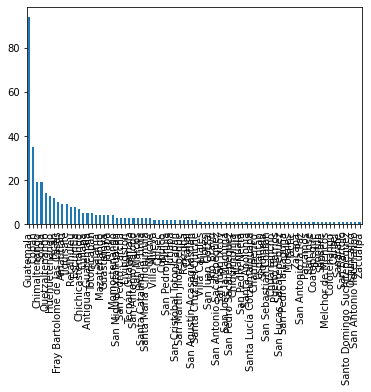

<Figure size 1440x360 with 0 Axes>


mon_reg


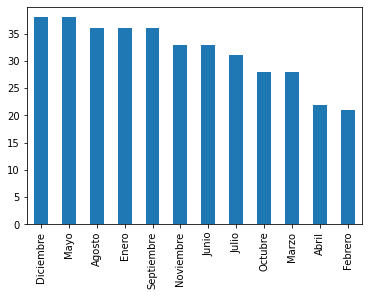

<Figure size 1440x360 with 0 Axes>


year_reg


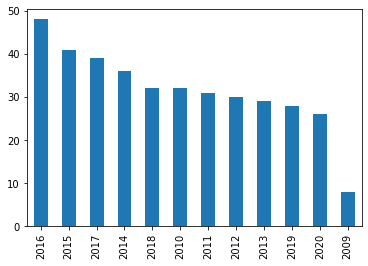

<Figure size 1440x360 with 0 Axes>


dep_occu


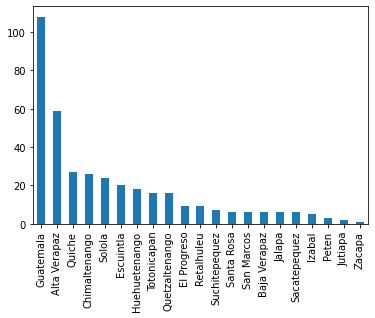

<Figure size 1440x360 with 0 Axes>


mun_occu


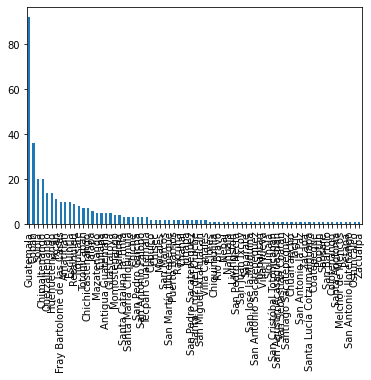

<Figure size 1440x360 with 0 Axes>


area_geog


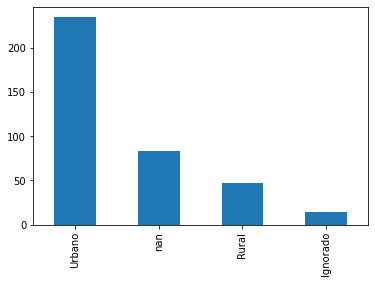

<Figure size 1440x360 with 0 Axes>


sex_death


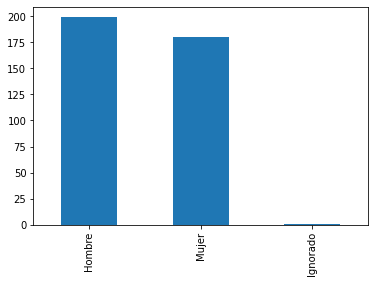

<Figure size 1440x360 with 0 Axes>


day_occu


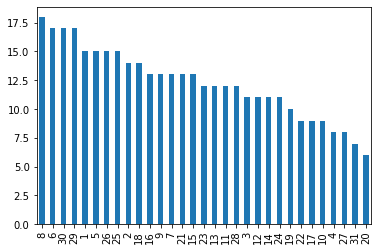

<Figure size 1440x360 with 0 Axes>


month_occu


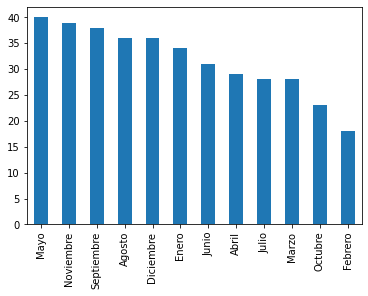

<Figure size 1440x360 with 0 Axes>


year_occu


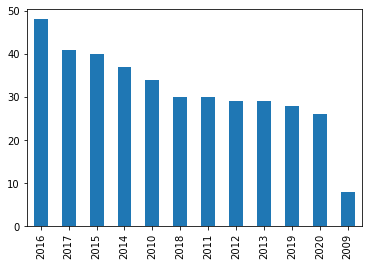

<Figure size 1440x360 with 0 Axes>


part_type


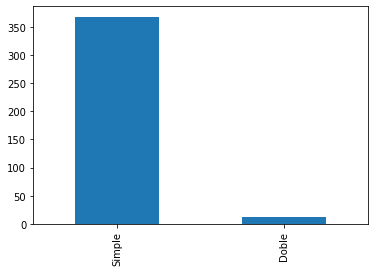

<Figure size 1440x360 with 0 Axes>


birth_class


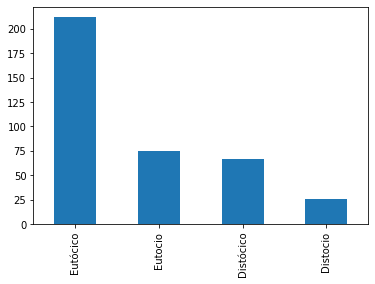

<Figure size 1440x360 with 0 Axes>


via_part


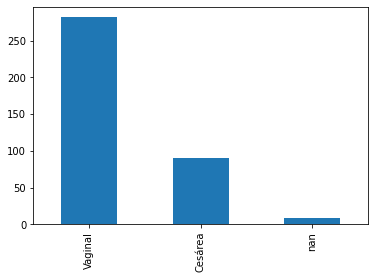

<Figure size 1440x360 with 0 Axes>


mom_country_res


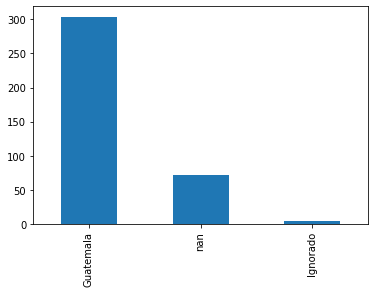

<Figure size 1440x360 with 0 Axes>


mom_dep_res


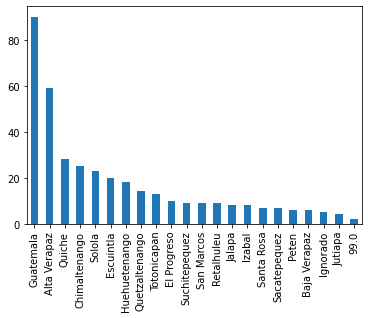

<Figure size 1440x360 with 0 Axes>


mom_mun_resi


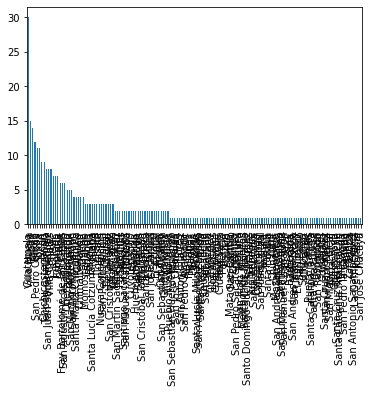

<Figure size 1440x360 with 0 Axes>


mom_group


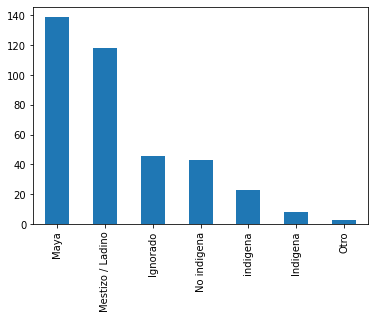

<Figure size 1440x360 with 0 Axes>


mom_civil_status


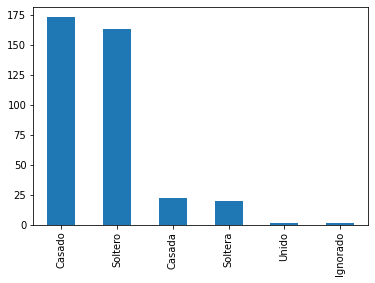

<Figure size 1440x360 with 0 Axes>


mom_nationality


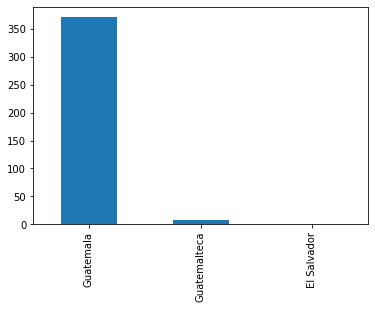

<Figure size 1440x360 with 0 Axes>


mom_scholarship


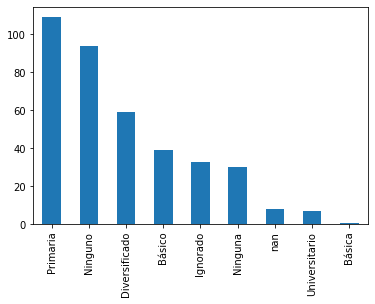

<Figure size 1440x360 with 0 Axes>


mom_occupation


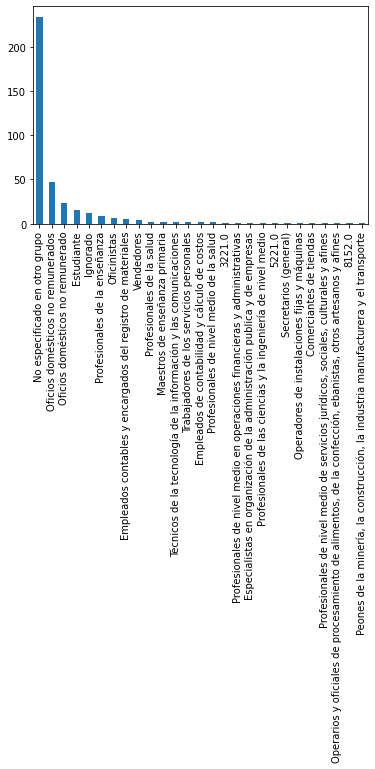

<Figure size 1440x360 with 0 Axes>


cause_death


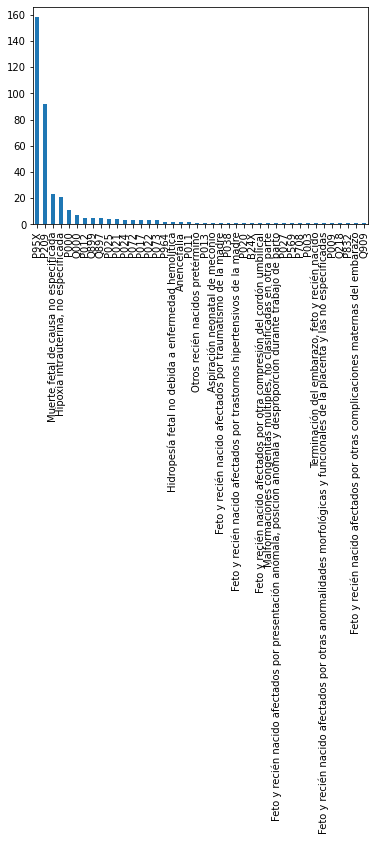

<Figure size 1440x360 with 0 Axes>


assistance_received


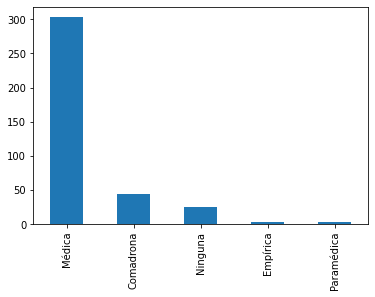

<Figure size 1440x360 with 0 Axes>


site_occu


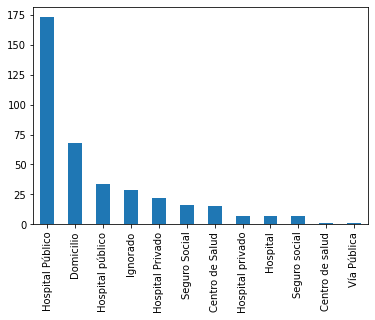

<Figure size 1440x360 with 0 Axes>

In [5]:
for var in qual_vars:
    data[var].value_counts().plot(kind='bar')
    plt.figure(figsize=(20,5))
    print('\n'+ var)
    plt.show()

## Clean of quant vars

In [6]:
quan_df = data[quan_vars]
quan_df[quan_vars] = quan_df[quan_vars].astype(float)
quan_df[quan_vars] = quan_df[quan_vars].astype(int)


graph_labels = [quan_vars[0], quan_vars[1]]

count    380.000000
mean      35.050000
std        5.649865
min        1.000000
25%       32.750000
50%       37.000000
75%       39.000000
max       42.000000
Name: weeks_ges, dtype: float64

weeks_ges: Kurtosis: 6.0663449760066985 Skewness: -1.8918151273034192 



count    380.000000
mean      28.257895
std        7.672506
min       14.000000
25%       22.000000
50%       28.000000
75%       34.000000
max       47.000000
Name: mother_age, dtype: float64

mother_age: Kurtosis: -0.859355151881382 Skewness: 0.22740661415478924 



count    212.000000
mean       4.216981
std        2.497410
min        1.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       13.000000
Name: total_children, dtype: float64

total_children: Kurtosis: 0.7498110694147031 Skewness: 1.1245251010464437 



count    259.000000
mean       1.274131
std        0.824848
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        9.000000
Name: total_dead_children, dtype: float64

total_dead_children: Kurtosis: 38.19558100224146 Skewness: 5.309646977631779 



count    233.000000
mean       2.931330
std        2.258033
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       12.000000
Name: total_living_children, dtype: float64

total_living_children: Kurtosis: 1.5558326065044472 Skewness: 1.361863264024808 



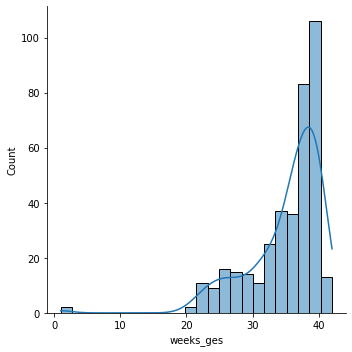

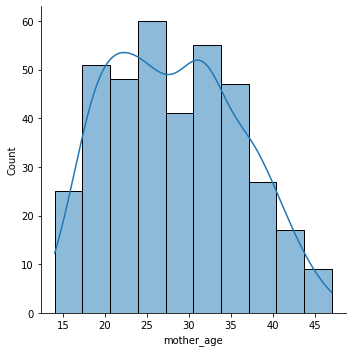

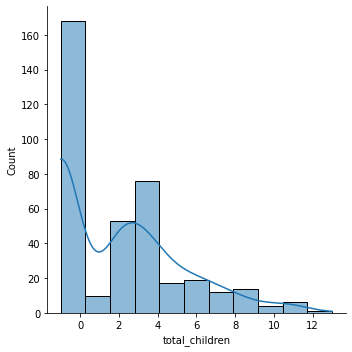

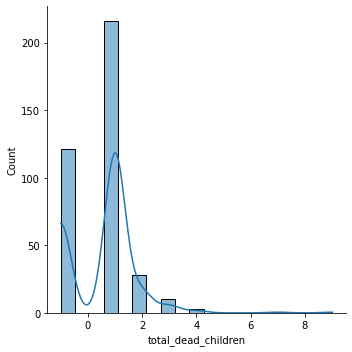

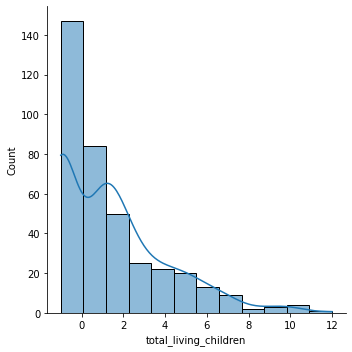

In [7]:
for var in quan_vars:
  serie = quan_df[quan_df[var] > 0][var]
  display(serie.describe())
  sns.displot(quan_df[var], kde=True)
  print('\033[1m' + var + '\033[0m' + ': Kurtosis:', stats.kurtosis(serie), 'Skewness:', stats.skew(serie), '\n')

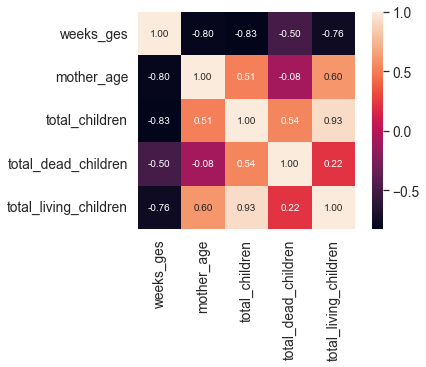

In [8]:
k = 10 #number of variables for heatmap
corrmat = quan_df.corr()
cm = np.corrcoef(corrmat.values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=quan_vars, xticklabels=quan_vars)
plt.show()

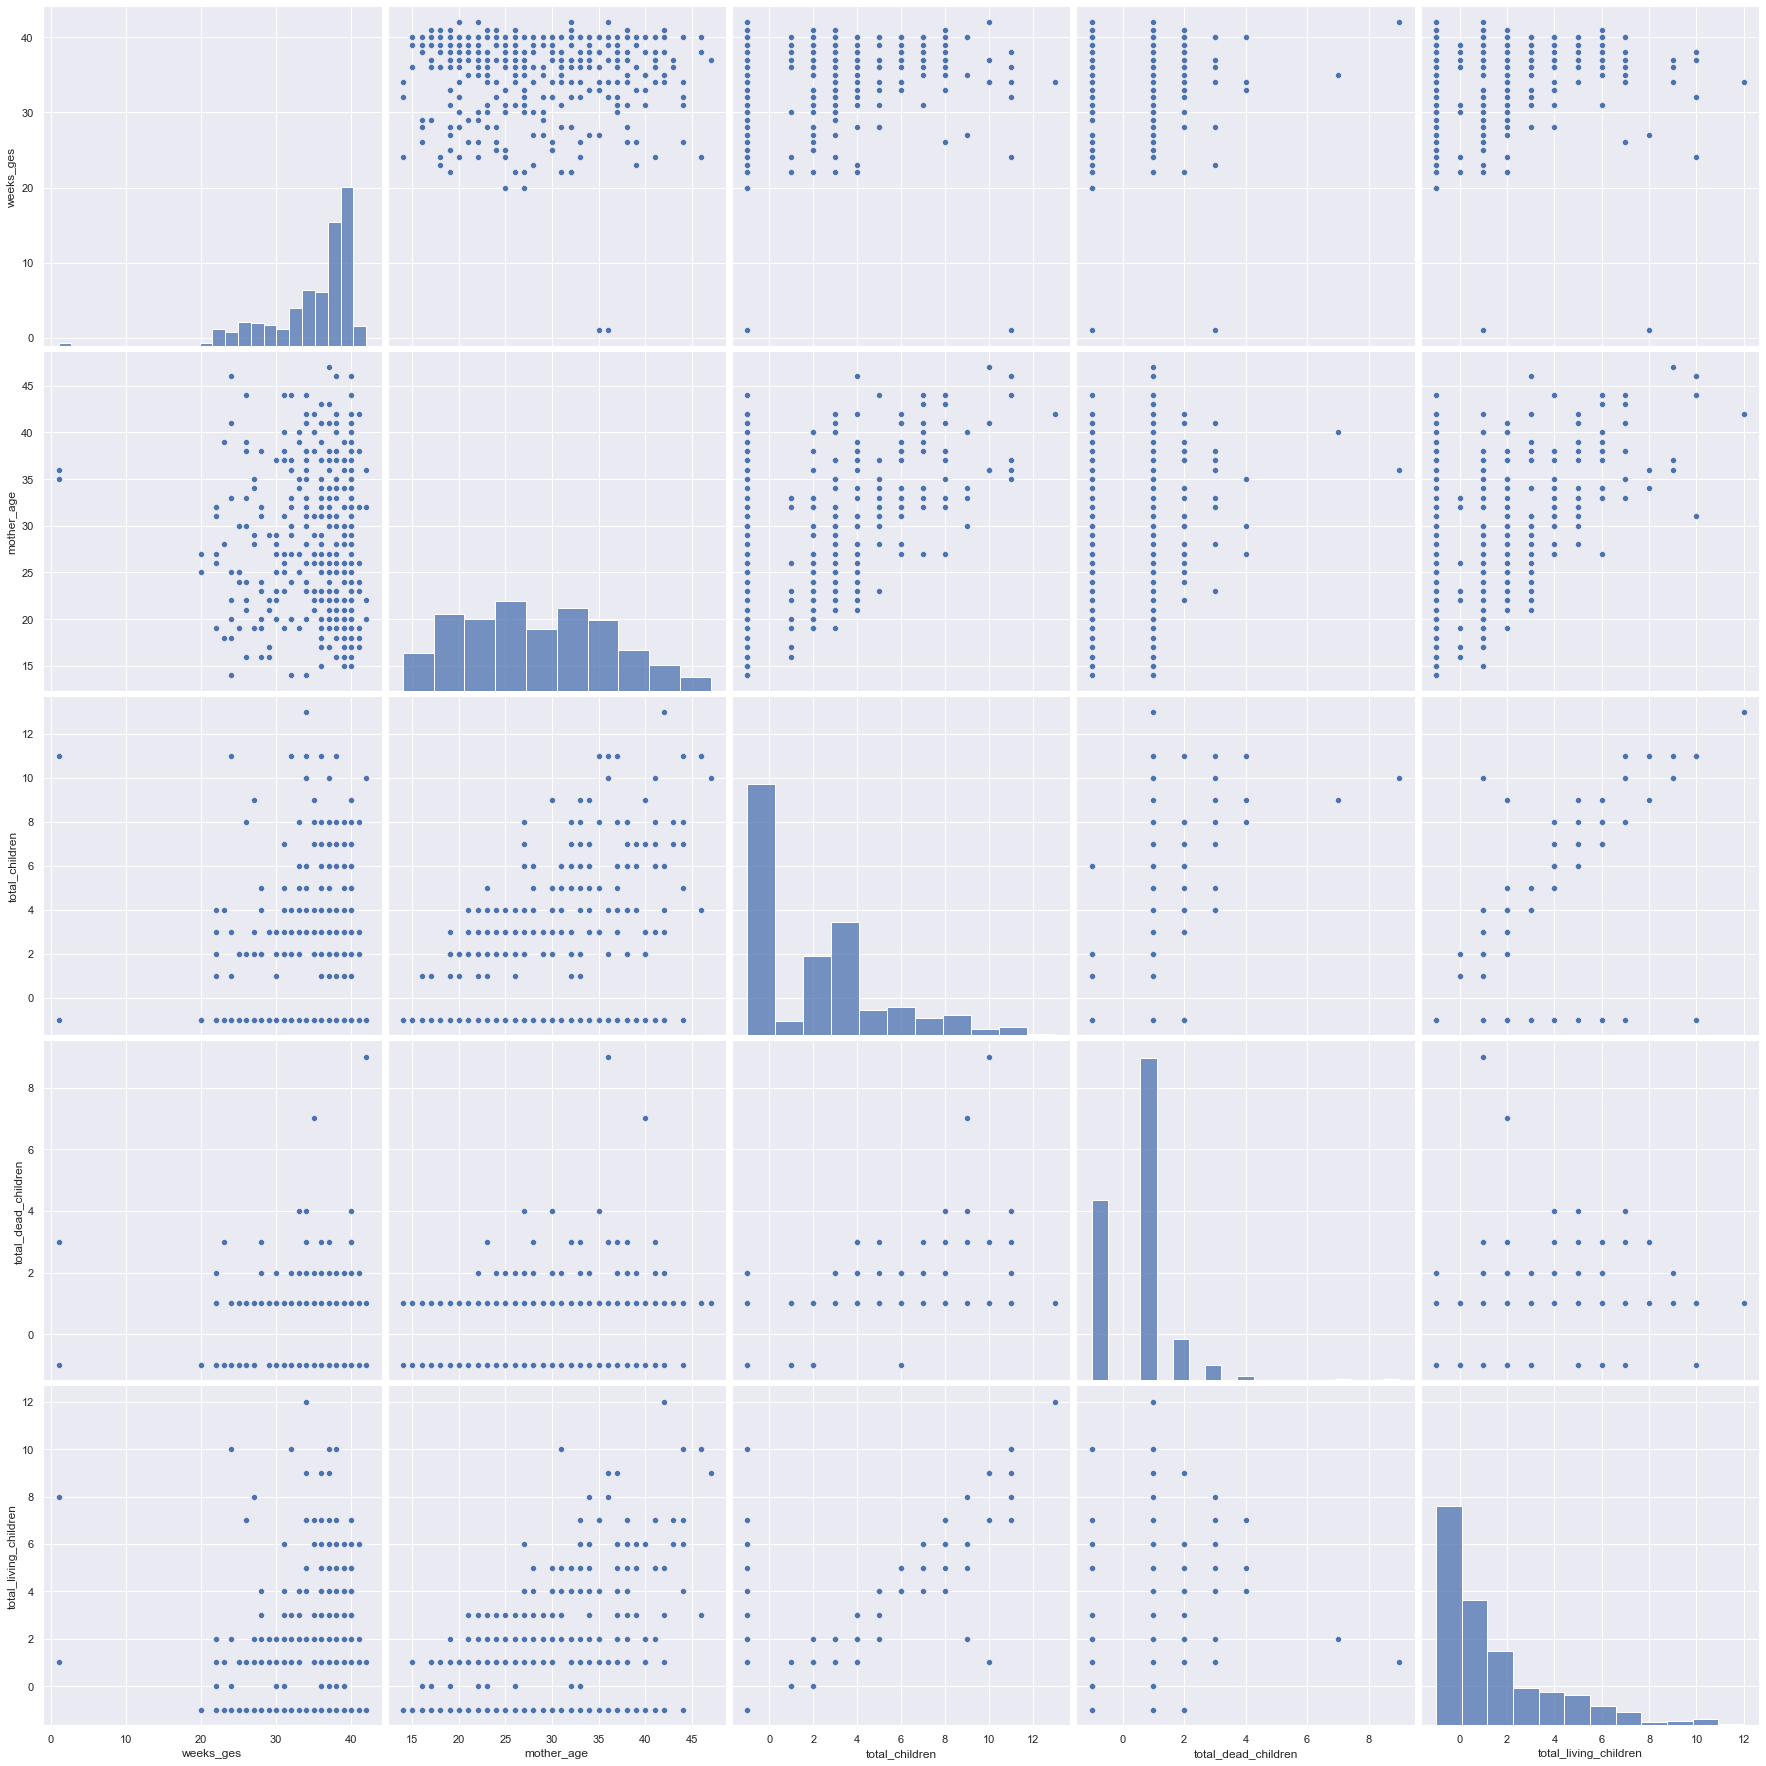

In [9]:
sns.set()
sns.pairplot(quan_df, height= 5)
plt.show()

## Exploración de datos

1. Comience  describiendo  cuantas  variables  y  observaciones  tiene  disponibles,  el tipo de cada una de las variables. 

2. Haga un resumen de las variables numéricas e investigue si siguen una distribución normal y tablas de frecuencia para las variables categóricas, escriba lo que vaya encontrando. 

3. Cruce  las  variables  que  considere  que  son  las  más  importantes  para  hallar  los elementos  clave  que  lo  pueden  llevar  a  comprender  lo  que  está  causando  el problema encontrado.

4. Haga gráficos exploratorios que le de ideas del estado de los datos. 

5. Haga un agrupamiento (clustering) e interprete los resultados. 

## Clustering

In [10]:
random.seed(123)
X_scale=sklearn.preprocessing.scale(quan_df)

pyclustertend.hopkins(X_scale, len(X_scale))

0.11648306199506528

El valor de hopkins es de 0.11, por lo que vale la pena hacer el agrupamiento al tener datos distribuidos de manera uniforme.

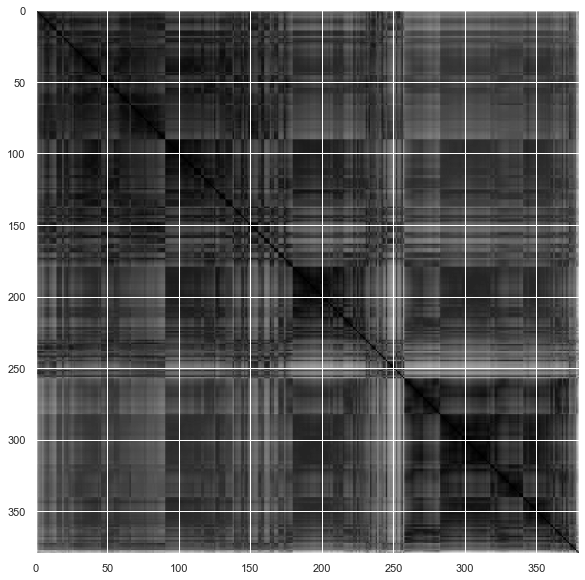

In [11]:
pyclustertend.vat(X_scale)

Se realiza la gráfica de codo para encontrar la cantidad óptima de clusters

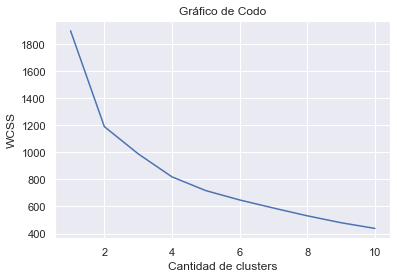

In [12]:
numeroClusters = range(1,11)

wcss = []
# Obtenemos 10 posibles clusters
for i in numeroClusters:
    # Se calcula la kmean con esa cantidad de clusters
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_scale)
    # Obtenemos la inercia
    wcss.append(kmeans.inertia_)

# Graficando
plt.plot(numeroClusters, wcss)
plt.xlabel("Cantidad de clusters")
plt.ylabel("WCSS")
plt.title("Gráfico de Codo")
plt.show()

Se harán uso de 4 clusters

In [13]:
number_clusters = 4
colors = ['mediumslateblue', 'skyblue', 'pink', 'cornflowerblue']

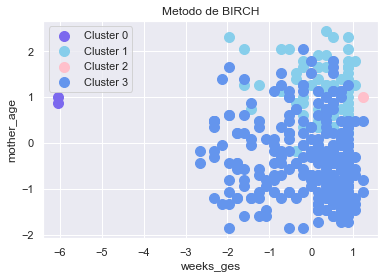

In [14]:
# Inicializar el modelo
birch_model = Birch(threshold=1.5, n_clusters=number_clusters)
birch_model.fit(X_scale)

# Obtenemos los puntos y los clusters
birch_result = birch_model.predict(X_scale)

for i in range(number_clusters):
    # Graficar los clusters
    plt.scatter(X_scale[birch_result == i, 0], X_scale[birch_result == i, 1], s = 100, c = colors[i], label = "Cluster %d" %i)

plt.title("Metodo de BIRCH")
plt.xlabel(graph_labels[0])
plt.ylabel(graph_labels[1])
plt.legend()
plt.show()

## Silueta

For n_clusters = 4 The average silhouette_score of BIRCH is: 0.34704844203472895


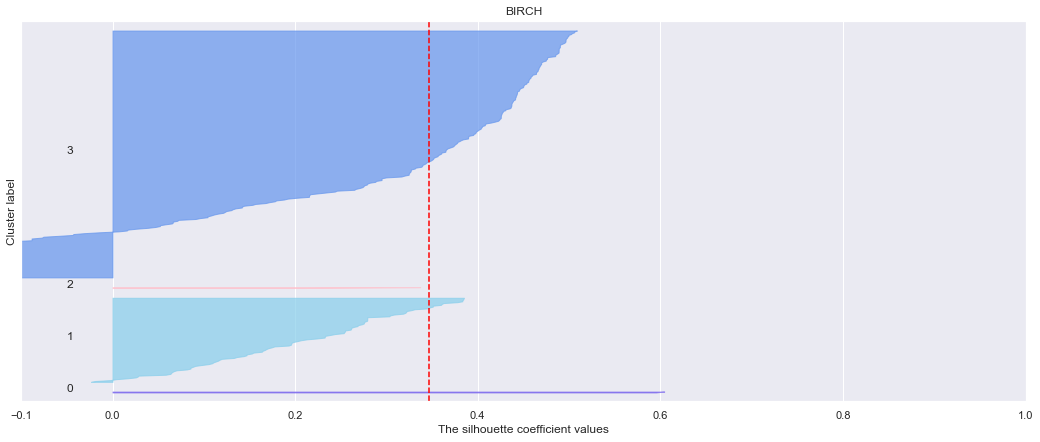

In [15]:
def make_silhouette(clusterer, n_clusters, label):
    fig, ax = plt.subplots(figsize=(1,1))
    fig.set_size_inches(18, 7)

    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X_scale) + (n_clusters + 1) * 10])

    cluster_labels = clusterer.fit_predict(X_scale)

    silhouette_avg = silhouette_score(X_scale, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score of",
        label,
        'is:',
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(quan_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = colors[i]
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title(label)
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([]) 
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

make_silhouette(birch_model, number_clusters, 'BIRCH')
plt.show()

## Matriz de confusion

In [16]:
stamps = ['dep_reg', 'assistance_received', 'site_occu', 'cause_death']

Cambiando las variables cualitativas a numeros

In [17]:
for stamp in stamps:
  aux = data.groupby(by=stamp)
  
  
  tag_group = list(aux.groups.keys())
  tag_group = [x.lower() for x in tag_group]
  tag_group = list(dict.fromkeys(tag_group))

  
  lower_case_col = data[[stamp]]
  lower_case_col[stamp] =  lower_case_col[stamp].str.lower()
  tags_list = lower_case_col.values.tolist()

  tags = []
  tag_to_number = {}
  number_to_taga = {}

  for i in range(len(tag_group)): 
    tag_to_number[tag_group[i]] = i
    number_to_taga[i] = tag_group[i]

  for i in range(len(tags_list)):
    tags.append(tag_to_number[tags_list[i][0]])

    # Se realiza el analisis de los grupos
  confusion_birch = confusion_matrix(birch_result, tags)[0:number_clusters]

  # Se observar como es que estan por categoria
  def get_category(confusion_array, label=''):
    print('_'*100)
    print('\nCONFUSION DE:', label, 'CON LA VARIABLE CUALITATIVA', stamp)
    keys = list(tag_to_number.keys())
    for i in range(number_clusters):
      print('\nCLUSTER #', i)
      result = list(confusion_array[i])
      index = result.index(max(result))
      '''
      for i in range(len(result)):
        print('%s con %d' %(keys[i], result[i]))
      '''

      print('Se asegura que es el grupo de: %s con %d' %(keys[index], result[index]))
    
    print('_'*100)

  get_category(confusion_birch, 'BIRCH')

____________________________________________________________________________________________________

CONFUSION DE: BIRCH CON LA VARIABLE CUALITATIVA dep_reg

CLUSTER # 0
Se asegura que es el grupo de: guatemala con 1

CLUSTER # 1
Se asegura que es el grupo de: alta verapaz con 18

CLUSTER # 2
Se asegura que es el grupo de: jalapa con 1

CLUSTER # 3
Se asegura que es el grupo de: guatemala con 94
____________________________________________________________________________________________________
____________________________________________________________________________________________________

CONFUSION DE: BIRCH CON LA VARIABLE CUALITATIVA assistance_received

CLUSTER # 0
Se asegura que es el grupo de: comadrona con 1

CLUSTER # 1
Se asegura que es el grupo de: médica con 72

CLUSTER # 2
Se asegura que es el grupo de: médica con 2

CLUSTER # 3
Se asegura que es el grupo de: médica con 228
_______________________________________________________________________________________________